[KRITIK AGARWAL 19BBTCS067](https://github.com/Kritik007)

Deep Learning Lab Experiment 10

K-Nearest Neighbour Algorithm: Write a program to implement k-Nearest Neighbour algorithm to classify the iris data set. Iris classification using tensor flow, print both correct and wrong predictions

#### KNN Algorithm to IRIS DataSet

In [1]:
# load iris dataset
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
print(iris.data.shape, iris.target.shape) # iris data and labels
print(iris.target_names) # names of labels
print(iris.feature_names) # names of attributes

(150, 4) (150,)
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


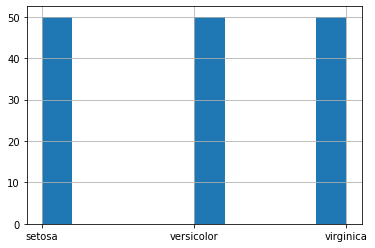

In [3]:
# plot group distribution
import pandas as pd
import matplotlib.pyplot as plt
target_str = pd.Series(iris.target).apply(lambda i: iris.target_names[i])
ax = target_str.hist()

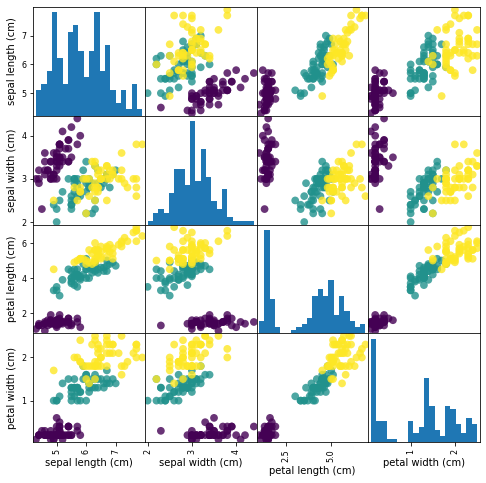

In [4]:
# iris as data frame
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
# create a scatter matrix from the dataframe, color by target
ax = pd.plotting.scatter_matrix(iris_df, c=iris.target, marker='o', figsize=(8,8), hist_kwds={'bins': 20}, s=60, alpha=.8)

In [5]:
# train test split
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(iris.data, iris.target, train_size=.75, random_state=12345)
print(xtrain.shape, ytrain.shape) # dimension of train set
print(xtest.shape, ytest.shape) # dimension of test set

(112, 4) (112,)
(38, 4) (38,)


In [6]:
# create a knn, k = 5
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [7]:
# fit to the train set
knn.fit(xtrain, ytrain);

In [8]:
ytrain_pred = knn.predict(xtrain) # predict on train set
ytest_pred = knn.predict(xtest) # predict on test set

In [9]:
# accuracy
acc_train = (ytrain == ytrain_pred).mean()
acc_test = (ytest == ytest_pred).mean()
print(f"Train set: {acc_train}")
print(f"Test set: {acc_test}")

Train set: 0.9642857142857143
Test set: 0.9736842105263158


In [10]:
# most frequent model
import numpy as np
ytest_most_frequent_pred = np.zeros(iris.target.shape[0])
acc_most_frequent = (iris.target == ytest_most_frequent_pred).mean()
print(f"Most frequent accuracy: {acc_most_frequent}")

Most frequent accuracy: 0.3333333333333333


In [11]:
# confusion matrix for train set
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
cM_train = confusion_matrix(ytrain, ytrain_pred)
cM_train

array([[37,  0,  0],
       [ 0, 34,  2],
       [ 0,  2, 37]])

In [12]:
# train set accuracy from confusion matrix
np.diag(cM_train).sum() / cM_train.sum()

0.9642857142857143

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


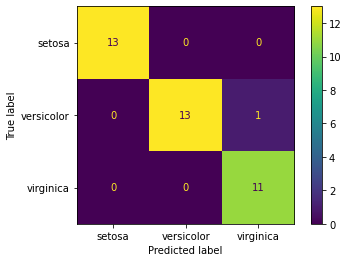

In [13]:
# plot test set confusion matrix as heatmap
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(knn, xtest, ytest, display_labels=iris.target_names);

In [14]:
# create a knn
from sklearn.neighbors import KNeighborsClassifier
knn2 = KNeighborsClassifier()

In [15]:
# tune hyperparameter k
from sklearn.model_selection import RandomizedSearchCV
distributions = dict(n_neighbors=list(range(1,50)))
clf = RandomizedSearchCV(knn2, distributions, random_state=0, n_iter = 10)
# run
search = clf.fit(xtrain, ytrain)
search.best_params_['n_neighbors']

5

In [16]:
# tune hyperparameter k
from sklearn.model_selection import GridSearchCV
parameters = dict(n_neighbors=list(range(1,50)))
clf2 = GridSearchCV(knn2, parameters)
# run
search2 = clf2.fit(xtrain, ytrain)
search2.best_params_['n_neighbors']

3

In [17]:
# classify with k = 3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain, ytrain)
# predict train and test
ytrain_pred = knn.predict(xtrain)
ytest_pred = knn.predict(xtest)
# accuracies
print((ytrain_pred == ytrain).mean())
print((ytest_pred == ytest).mean())

0.9642857142857143
0.9736842105263158


In [18]:
# accuracy on train and test sets over parameter values
acc_train,acc_test = [],[]
for k in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain, ytrain)
    acc_train.append((ytrain != knn.predict(xtrain)).mean())
    acc_test.append((ytest != knn.predict(xtest)).mean())

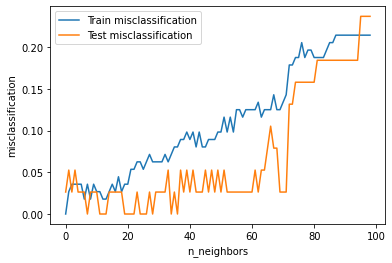

In [19]:
# plot accuracies over n_neighbors
plt.plot(acc_train, label='Train misclassification')
plt.plot(acc_test, label='Test misclassification')
plt.legend()
plt.xlabel("n_neighbors")
plt.ylabel("misclassification");

#### IRIS Data Classification using Tensorflow

In [20]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [21]:
iris_data = load_iris() # load the iris dataset

In [22]:
print('Example data: ')
print(iris_data.data[:5])

Example data: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [23]:
print('Example labels: ')
print(iris_data.target[:5])

Example labels: 
[0 0 0 0 0]


In [24]:
x = iris_data.data
y_ = iris_data.target.reshape(-1, 1) # Convert data to a single column

In [26]:
# One Hot encode the class labels
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y_)

In [27]:
# Split the data for training and testing
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20)

In [28]:
# Build the model
model = Sequential()
model.add(Dense(10, input_shape=(4,), activation='relu', name='fc1'))
model.add(Dense(10, activation='relu', name='fc2'))
model.add(Dense(3, activation='softmax', name='output'))

In [29]:
# Adam optimizer with learning rate of 0.001
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
print('Neural Network Model Summary: ')
print(model.summary())

Neural Network Model Summary: 
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc1 (Dense)                 (None, 10)                50        
                                                                 
 fc2 (Dense)                 (None, 10)                110       
                                                                 
 output (Dense)              (None, 3)                 33        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
None


In [30]:
# Train the model
model.fit(train_x, train_y, verbose=2, batch_size=5, epochs=200)

Epoch 1/200
24/24 - 2s - loss: 1.3394 - accuracy: 0.3500 - 2s/epoch - 75ms/step
Epoch 2/200
24/24 - 0s - loss: 1.1987 - accuracy: 0.3417 - 143ms/epoch - 6ms/step
Epoch 3/200
24/24 - 0s - loss: 1.0994 - accuracy: 0.2583 - 116ms/epoch - 5ms/step
Epoch 4/200
24/24 - 0s - loss: 1.0347 - accuracy: 0.2417 - 89ms/epoch - 4ms/step
Epoch 5/200
24/24 - 0s - loss: 0.9799 - accuracy: 0.1833 - 79ms/epoch - 3ms/step
Epoch 6/200
24/24 - 0s - loss: 0.9349 - accuracy: 0.2583 - 65ms/epoch - 3ms/step
Epoch 7/200
24/24 - 0s - loss: 0.9005 - accuracy: 0.2833 - 88ms/epoch - 4ms/step
Epoch 8/200
24/24 - 0s - loss: 0.8827 - accuracy: 0.3167 - 64ms/epoch - 3ms/step
Epoch 9/200
24/24 - 0s - loss: 0.8702 - accuracy: 0.4167 - 116ms/epoch - 5ms/step
Epoch 10/200
24/24 - 0s - loss: 0.8452 - accuracy: 0.5917 - 91ms/epoch - 4ms/step
Epoch 11/200
24/24 - 0s - loss: 0.8294 - accuracy: 0.6333 - 62ms/epoch - 3ms/step
Epoch 12/200
24/24 - 0s - loss: 0.8157 - accuracy: 0.6500 - 64ms/epoch - 3ms/step
Epoch 13/200
24/24 - 0s

In [31]:
# Test on unseen data
results = model.evaluate(test_x, test_y)
print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

1/1 [==============================] - 0s 364ms/step - loss: 0.1586 - accuracy: 0.9333
Final test set loss: 0.158585
Final test set accuracy: 0.933333
